# Indian Agricultural Crop Yield Predictions

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import matplotlib.patches as mpatches

In [2]:
# Loading the crop_yield dataset
df = pd.read_csv('/content/crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
print("Shape of the dataset : ",df.shape) # checking the shape of the dataset

Shape of the dataset :  (19689, 10)


In [4]:
df.describe() # checking the statistical measures of the dataset

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [5]:
df.info() # checking the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
df.duplicated().sum()  #checking the duplicates

0

In [7]:
columns_to_check = ['Crop', 'Season', 'State'] # checking the unqiue values of column whose datatype is object

for col in columns_to_check:
    print(f'------------------------------- {col} -------------------------------')
    unique_values = df[col].unique().tolist()
    print(f'Total different values of {col}: {len(unique_values)}')
    print(f'Different values of {col}: {unique_values}')
    print("\n")


------------------------------- Crop -------------------------------
Total different values of Crop: 55
Different values of Crop: ['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)', 'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta', 'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato', 'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets', 'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric', 'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander', 'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi', 'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor', 'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower', 'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)', 'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)', 'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth']


------------------------------- Season -------------------------------
Total different values of Season: 6
Different values of Season: ['Whole Ye

In [8]:
# removing extra spaces in season
df['Season'] = df['Season'].replace({'Whole Year ':'Whole Year','Kharif     ':'Kharif', 'Rabi       ':'Rabi', 'Autumn     ':'Autumn', 'Summer     ':'Summer', 'Winter     ':'Winter'})

In [9]:
df = df[df['Crop_Year']!=2020]  # data is incomplete for year 2020 so removing it


# Analysis & Visualization of the dataset


## Year wise analysis

In [10]:
# Grouping the data on basis of year and add it

yield_per_year = df.groupby('Crop_Year').sum()
#yield_per_year

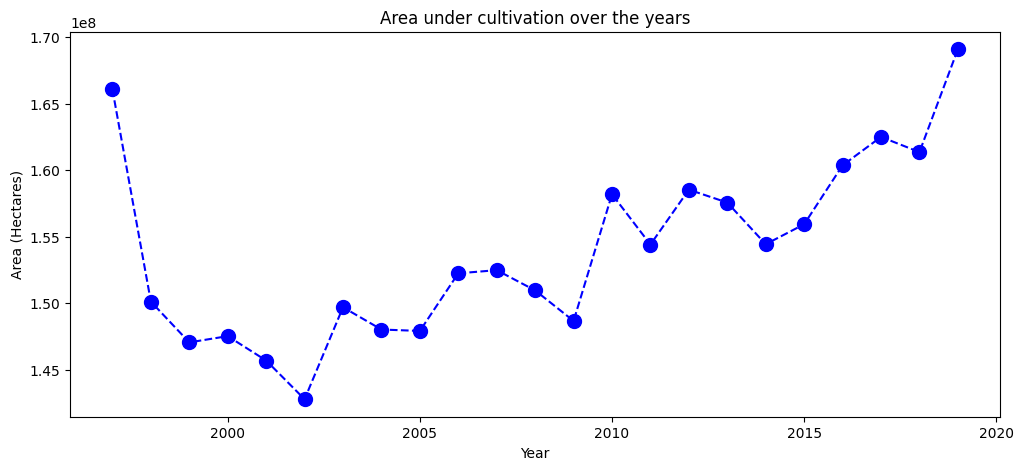

In [11]:
# plotting the total area under cultivation over the years
plt.figure(figsize = (12,5))
plt.plot(yield_per_year.index, yield_per_year['Area'],color='blue', linestyle='dashed', marker='o', markersize=10, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Area (Hectares)')
plt.title('Area under cultivation over the years')
plt.show()


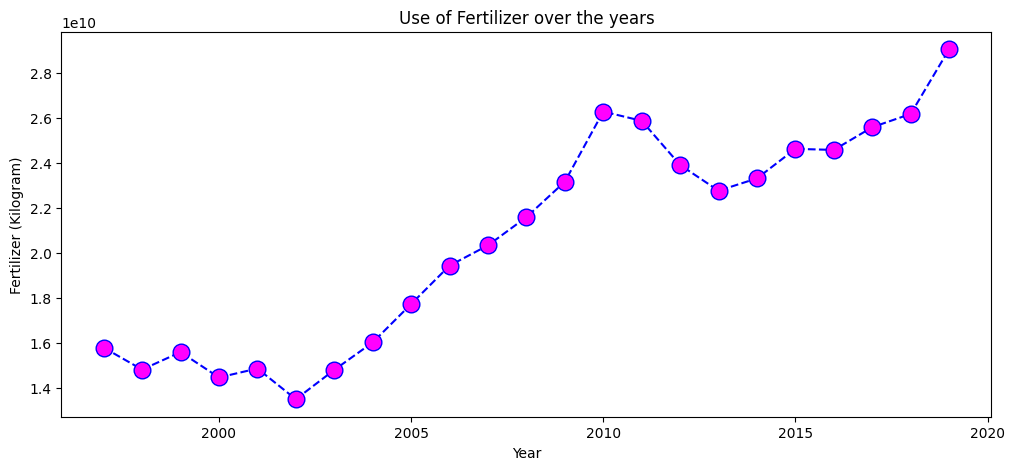

In [12]:
# plotting the total fertilizer used over the years

plt.figure(figsize = (12,5))
plt.plot(yield_per_year.index, yield_per_year['Fertilizer'],color='blue', linestyle='dashed', marker='o', markersize=12, markerfacecolor='magenta')
plt.xlabel('Year')
plt.ylabel('Fertilizer (Kilogram)')
plt.title('Use of Fertilizer over the years')
plt.show()


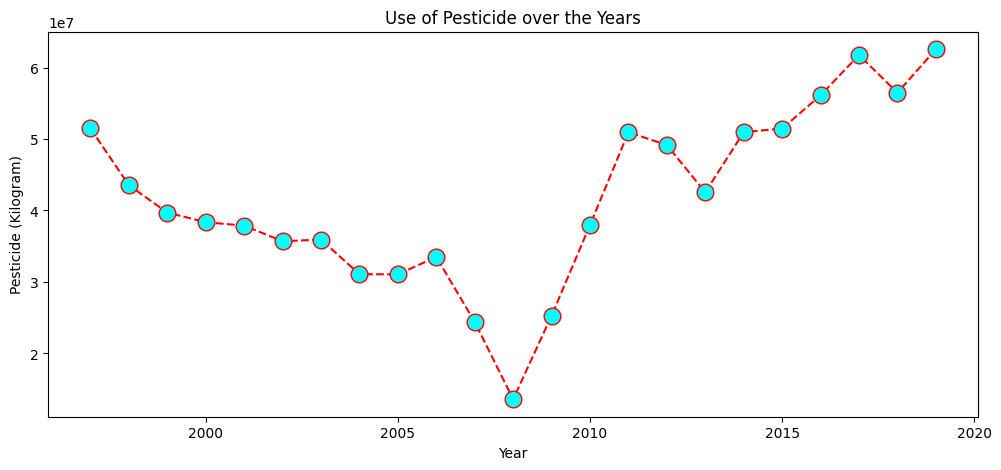

In [13]:
# plotting the total pesticide used over the years

plt.figure(figsize = (12,5))
plt.plot(yield_per_year.index, yield_per_year['Pesticide'],color='red', linestyle='dashed', marker='o', markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide (Kilogram)')
plt.title('Use of Pesticide over the Years')
plt.show()

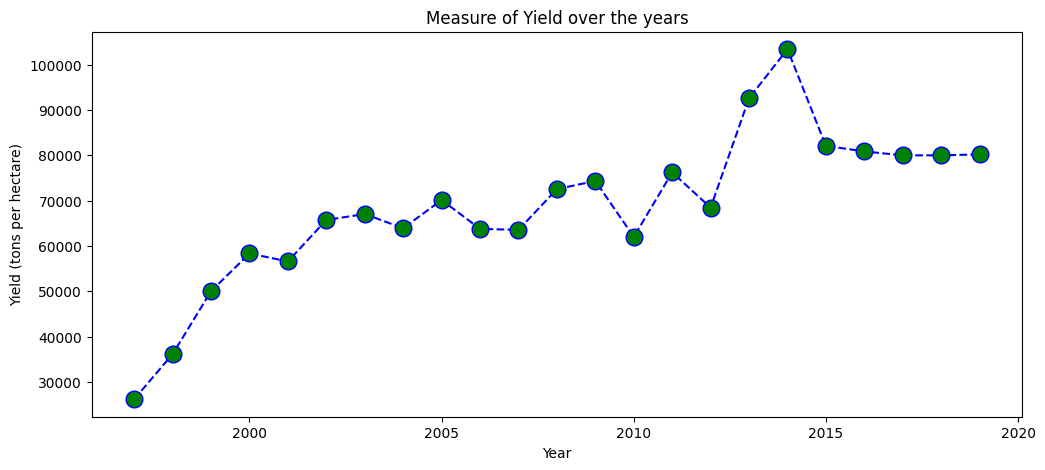

In [14]:
# plotting the total crop yield used over the years

plt.figure(figsize = (12,5))
plt.plot(yield_per_year.index, yield_per_year['Yield'],color='blue', linestyle='dashed', marker='o', markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Measure of Yield over the years')
plt.show()

Observation:

The crop yield had an increasing trend where it reached all time peak in 2014 and then decreased slightly. Both pesticides and fertilizer usage were increasing.   

## State wise analysis

In [15]:
# Load the GeoJSON file for Indian states
india_map = gpd.read_file('/content/india_telengana.geojson') # loading the geojson file to get geodataframa of india map

# print(india_map)
india_ut = ['Andaman and Nicobar', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Puducherry', 'Lakshadweep', 'Chandigarh']
india_states_original = india_map.drop(india_map[india_map['NAME_1'].isin(india_ut)].index)  # removing the union territories  of india

# updating the names of states as per the dataset
india_states_original['NAME_1'] = india_states_original['NAME_1'].replace('Orissa','Odisha')
india_states_original['NAME_1'] = india_states_original['NAME_1'].replace('Uttaranchal','Uttarakhand')

In [16]:
df_filtered = df[df['Crop_Year'].isin([1999, 2009, 2019])] # Taking the cultivated area for 3 years (1999, 2009, 2019)


df_area = df_filtered.groupby(['State', 'Crop_Year'])['Area'].sum().unstack()

#df_area

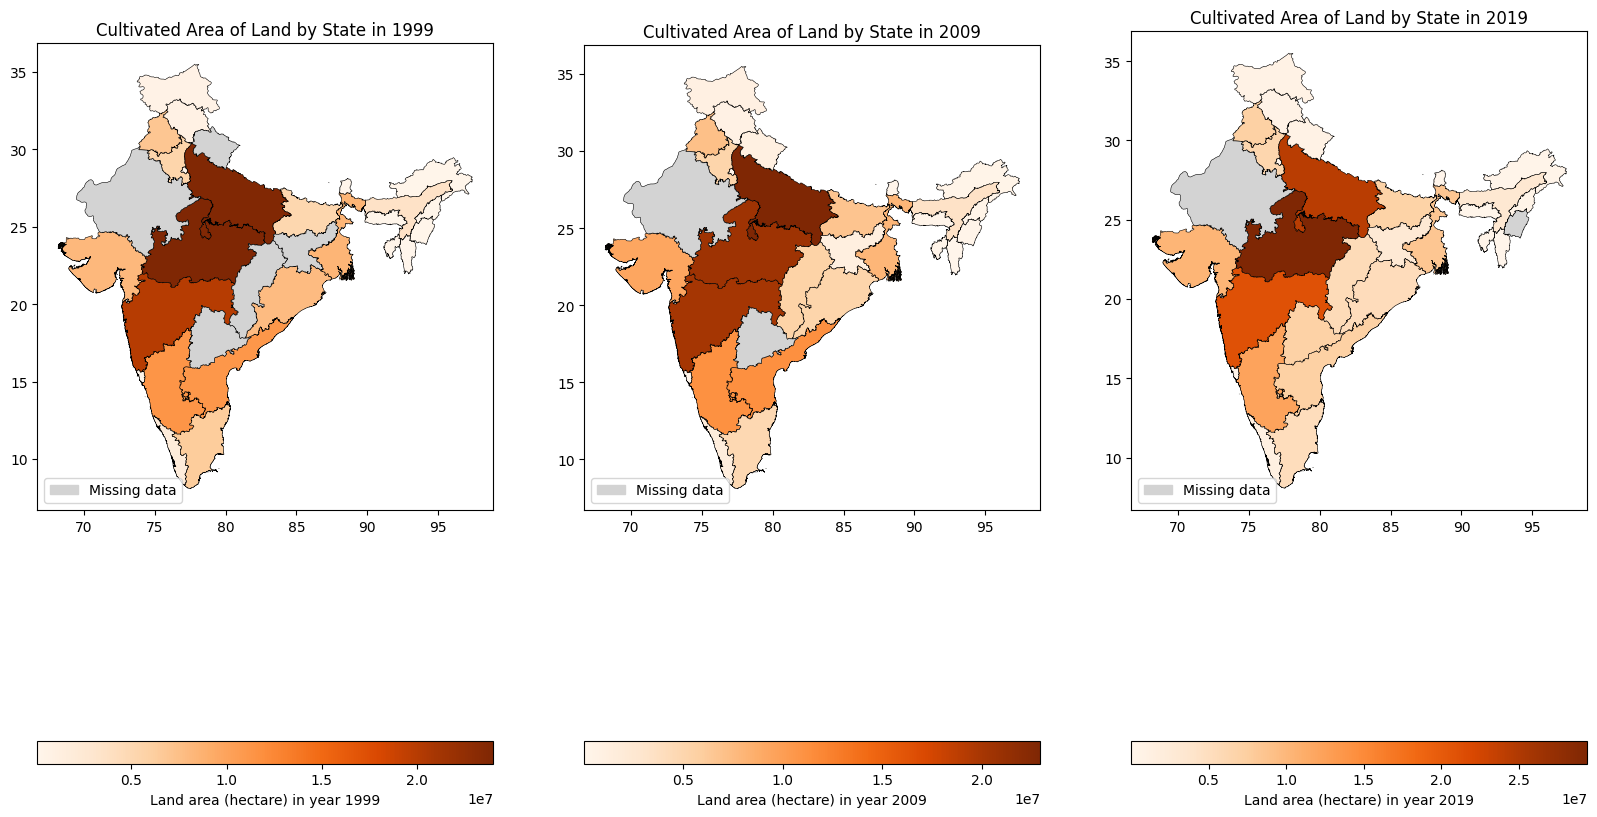

In [17]:
crop_year = [ 1999, 2009, 2019]


india_states_area = india_states_original.copy() # making a copy of geodataframe of indian map

india_states_area = india_states_area.merge(df_area, how='left', left_on='NAME_1', right_on='State') # merging geo-dataframe and df_area by left join
#print(india_states_copy.head())

fig, axes = plt.subplots(1, len(crop_year), figsize=(20, 20))

for i, var in enumerate(crop_year):
      ax = axes[i]
      india_states_area.plot(column=var, ax=ax, edgecolor='black', linewidth=0.4, legend=True, cmap='Oranges',
                            legend_kwds={"label": "Land area (hectare) in year "+ str(var), "orientation": "horizontal"}, # plotting the geodataframe
                            missing_kwds={"color": "lightgrey", "label": "Missing data"})

      missing_patch = mpatches.Patch(color='lightgrey', label='Missing data') # data is missing for the Rajasthan state
      ax.legend(handles=[missing_patch], loc='lower left')
      ax.set_title(f"Cultivated Area of Land by State in {crop_year[i]}")




plt.show()

Observation:

The above figure gives the overview of area of land cultivated over 20 years period. Overall we can see decreasing area of land usage for cultivation  

In [18]:
#finding mean annual rainfall of all the states

df_unique_rainfall = df.drop_duplicates(subset=['State', 'Annual_Rainfall'])

mean_rainfall = df_unique_rainfall.groupby('State')['Annual_Rainfall'].mean().reset_index()

mean_rainfall.columns = ['state', 'mean_annual_rainfall']




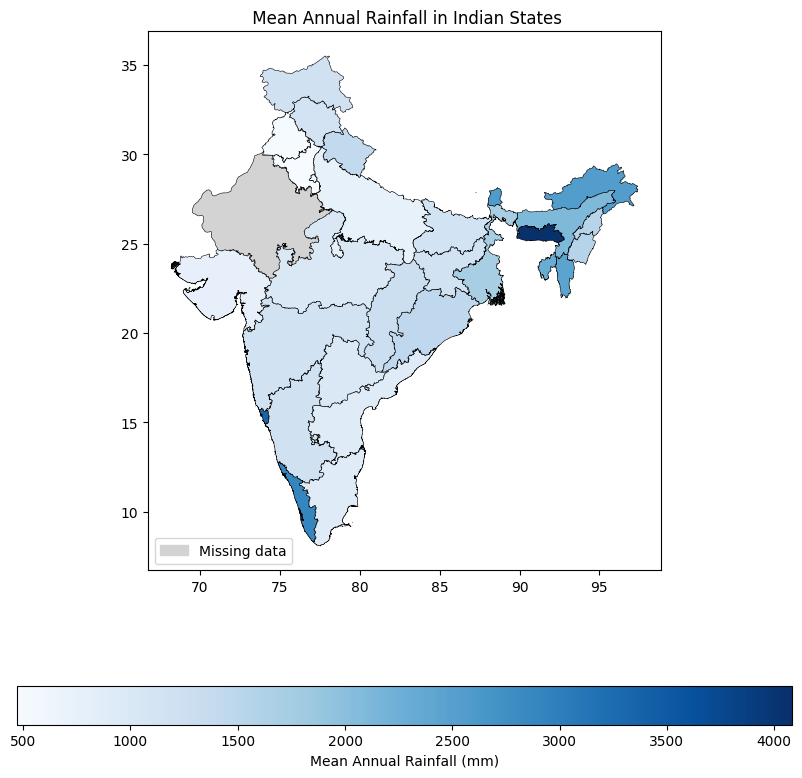

In [19]:
# plotting mean annual rainfall of indian states

india_states_rainfall = india_states_original.copy()

india_states_rainfall = india_states_rainfall.merge(mean_rainfall, how='left', left_on='NAME_1', right_on='state')

#print(india_states_rainfall)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
india_states_rainfall.plot(column='mean_annual_rainfall', ax=ax, edgecolor='black',linewidth=0.4,legend=True, cmap='Blues',
                   legend_kwds={"label": "Mean Annual Rainfall (mm)",
                                "orientation": "horizontal"},
                   missing_kwds={"color": "lightgrey",
                                "label": "Missing data"}
                  )


missing_patch = mpatches.Patch(color='lightgrey', label='Missing data')
plt.legend(handles=[missing_patch], loc='lower left')

plt.title(" Mean Annual Rainfall in Indian States")
plt.show()

Observation:


The northeastern part recieves highest rainfall in the country followed by southern state kerala. The western part recieves less rainfall compared to other parts of the country  

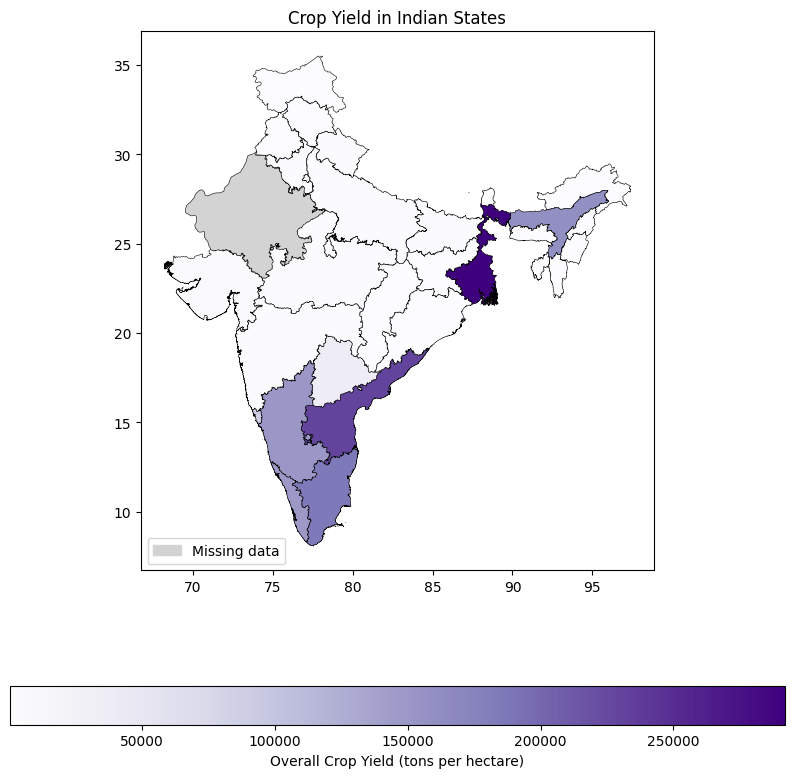

In [20]:
# finding overall crop yield in the indian states

df_state = df.groupby('State').sum()

india_states_crop_yield = india_states_original.copy()

india_states_crop_yield = india_states_crop_yield.merge(df_state, how='left', left_on='NAME_1', right_on='State')

#india_states.to_csv('india_states_crop_yield.csv')
#print(india_states)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
india_states_crop_yield.plot(column='Yield', ax=ax, edgecolor='black', linewidth=0.4,legend=True, cmap='Purples',
                   legend_kwds={'label': "Overall Crop Yield (tons per hectare)",
                                'orientation': "horizontal"},
                   missing_kwds={"color": "lightgrey", "label": "Missing data"})


missing_patch = mpatches.Patch(color='lightgrey', label='Missing data')
ax.legend(handles=[missing_patch], loc='lower left')


plt.title("Crop Yield in Indian States")
plt.show()

Observation:

States like west bengal and andhra pradesh shows high crop yield. overall, southern states and northeastern part have relatively good agricultural productivity compared to other regions.   

# Season wise analysis

<ipython-input-21-c5d49e22f889>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Area', data=df_season_area, palette='viridis')


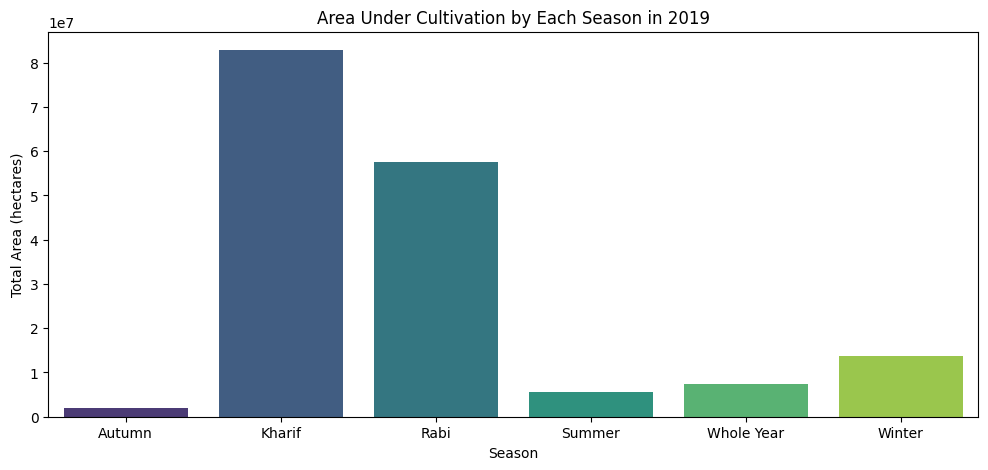

In [21]:
# finding the area culivated for each season in year 2019

df_2019 = df[df['Crop_Year']==2019]
df_season_area = df_2019.groupby('Season').agg({'Area': 'sum'}).reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='Season', y='Area', data=df_season_area, palette='viridis')
plt.title('Area Under Cultivation by Each Season in 2019')
plt.ylabel('Total Area (hectares)')
plt.show()


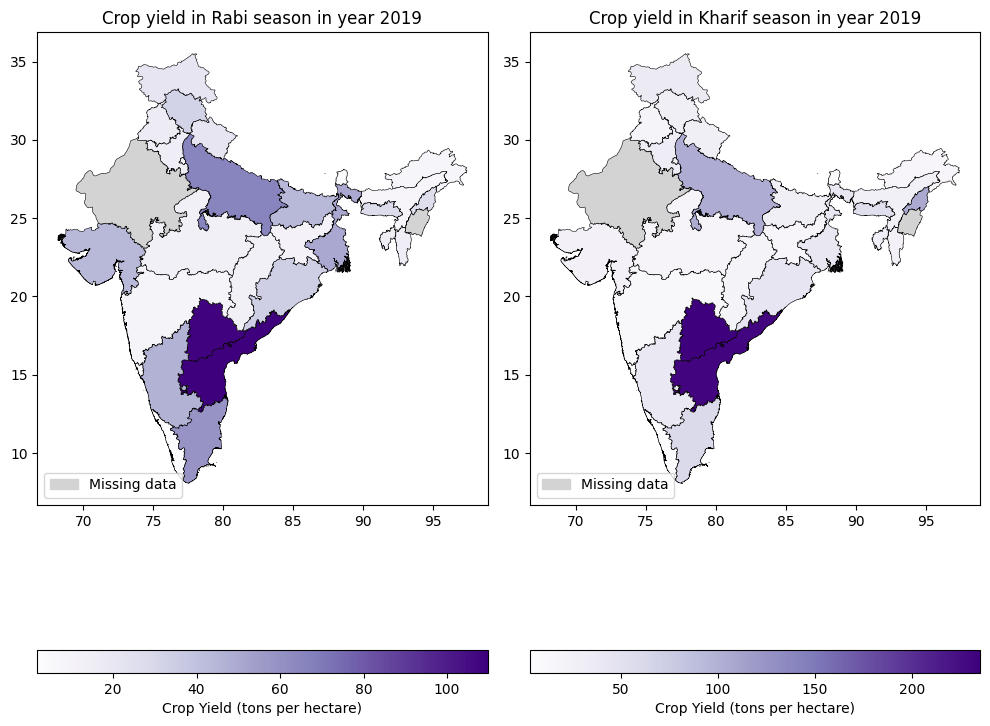

In [22]:
#  Crop yield for Rabi and Kharif season in indian states for the year 2019

seasons = ['Rabi', 'Kharif']

df_filtered = df[(df['Crop_Year'] == 2019) & (df['Season'].isin(seasons))]

df_grouped = df_filtered.groupby(['State', 'Season'])['Yield'].sum().reset_index()


fig, axes = plt.subplots(1, len(seasons), figsize=(10, 10))

for i, name in enumerate(seasons):

      india_states_seasons = india_states_original.copy()

      india_states_seasons = india_states_seasons.merge(df_grouped[df_grouped['Season'] == name], how='left', left_on='NAME_1', right_on='State')

      ax = axes[i]

      india_states_seasons.plot(column='Yield', ax=ax, edgecolor='black', linewidth=0.4, legend=True, cmap='Purples',
                            legend_kwds={"label": f"Crop Yield (tons per hectare)", "orientation": "horizontal"},
                            missing_kwds={"color": "lightgrey", "label": "Missing data"})

      missing_patch = mpatches.Patch(color='lightgrey', label='Missing data')
      ax.legend(handles=[missing_patch], loc='lower left')
      ax.set_title(f"Crop yield in {name} season in year 2019")



plt.tight_layout()
plt.show()


Observation:

In both the seasons, the southern states like telangana and andhra pradesh give high crop yield. However, there's noticeable shift in eastern states and some southern states.

# Crop wise Analysis

In [23]:
# finding number of different crops grown in each indian state

df_crops_count = df.groupby('State')['Crop'].nunique().reset_index()
df_crops_count.columns = ['state', 'crop_count']
#df_crops_count

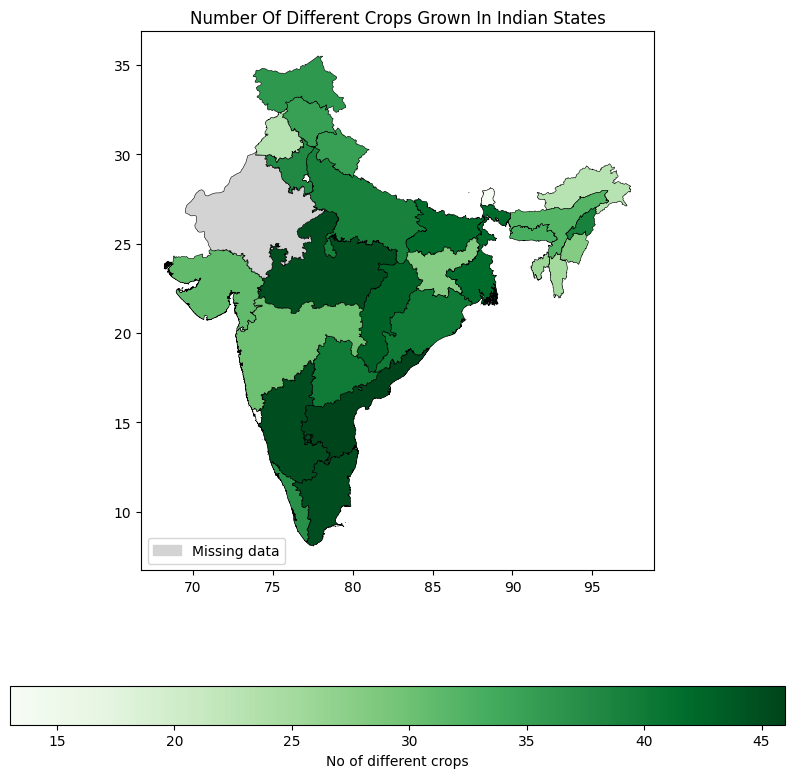

In [24]:
# plotting heatmap of number of diiferent crops grown in each indian state

india_states_crop = india_states_original.copy()

india_states_crop = india_states_crop.merge(df_crops_count, how='left', left_on='NAME_1', right_on='state')


#print(india_states_crop)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
india_states_crop.plot(column='crop_count', ax=ax, edgecolor='black', linewidth=0.4,legend=True, cmap='Greens',
                   legend_kwds={'label': "No of different crops",
                                'orientation': "horizontal"},
                   missing_kwds={"color": "lightgrey", "label": "Missing data"})


missing_patch = mpatches.Patch(color='lightgrey', label='Missing data')
ax.legend(handles=[missing_patch], loc='lower left')
#ax.set_title(f" {titles[i]} in Indian States")

plt.title("Number Of Different Crops Grown In Indian States")
plt.show()

Observation:

Different varities of crops are in many states.

In [25]:
# filtering the data where yeild is more greater than 0

df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum() # group the rows as per the column crop
#df_crop

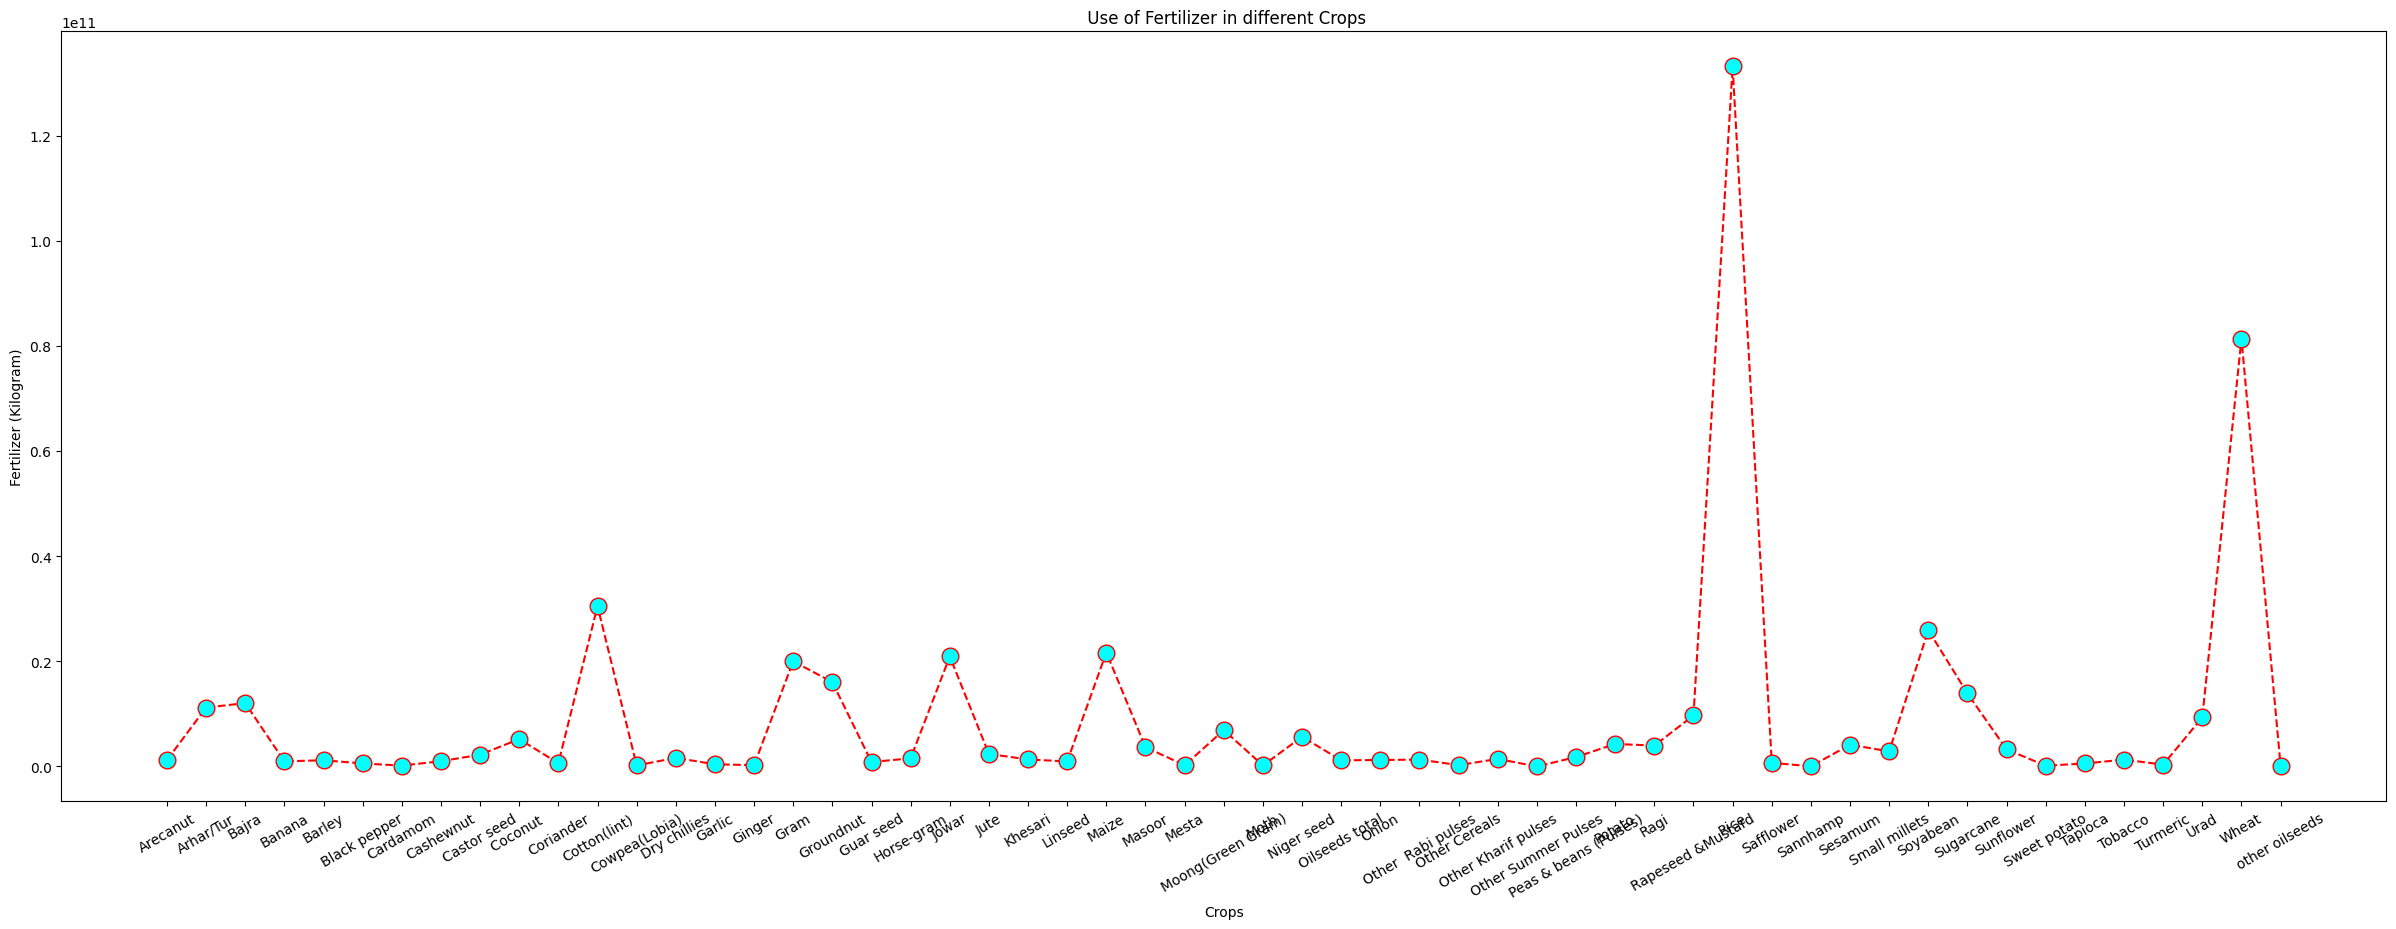

In [26]:
# plotting a line graph to find which crop uses more fertilizer

plt.figure(figsize = (30,10))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer (Kilogram)')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()

Observation:

Rice and Rapeseed & mustard crop used highest amount of fertilizer followed by wheat.

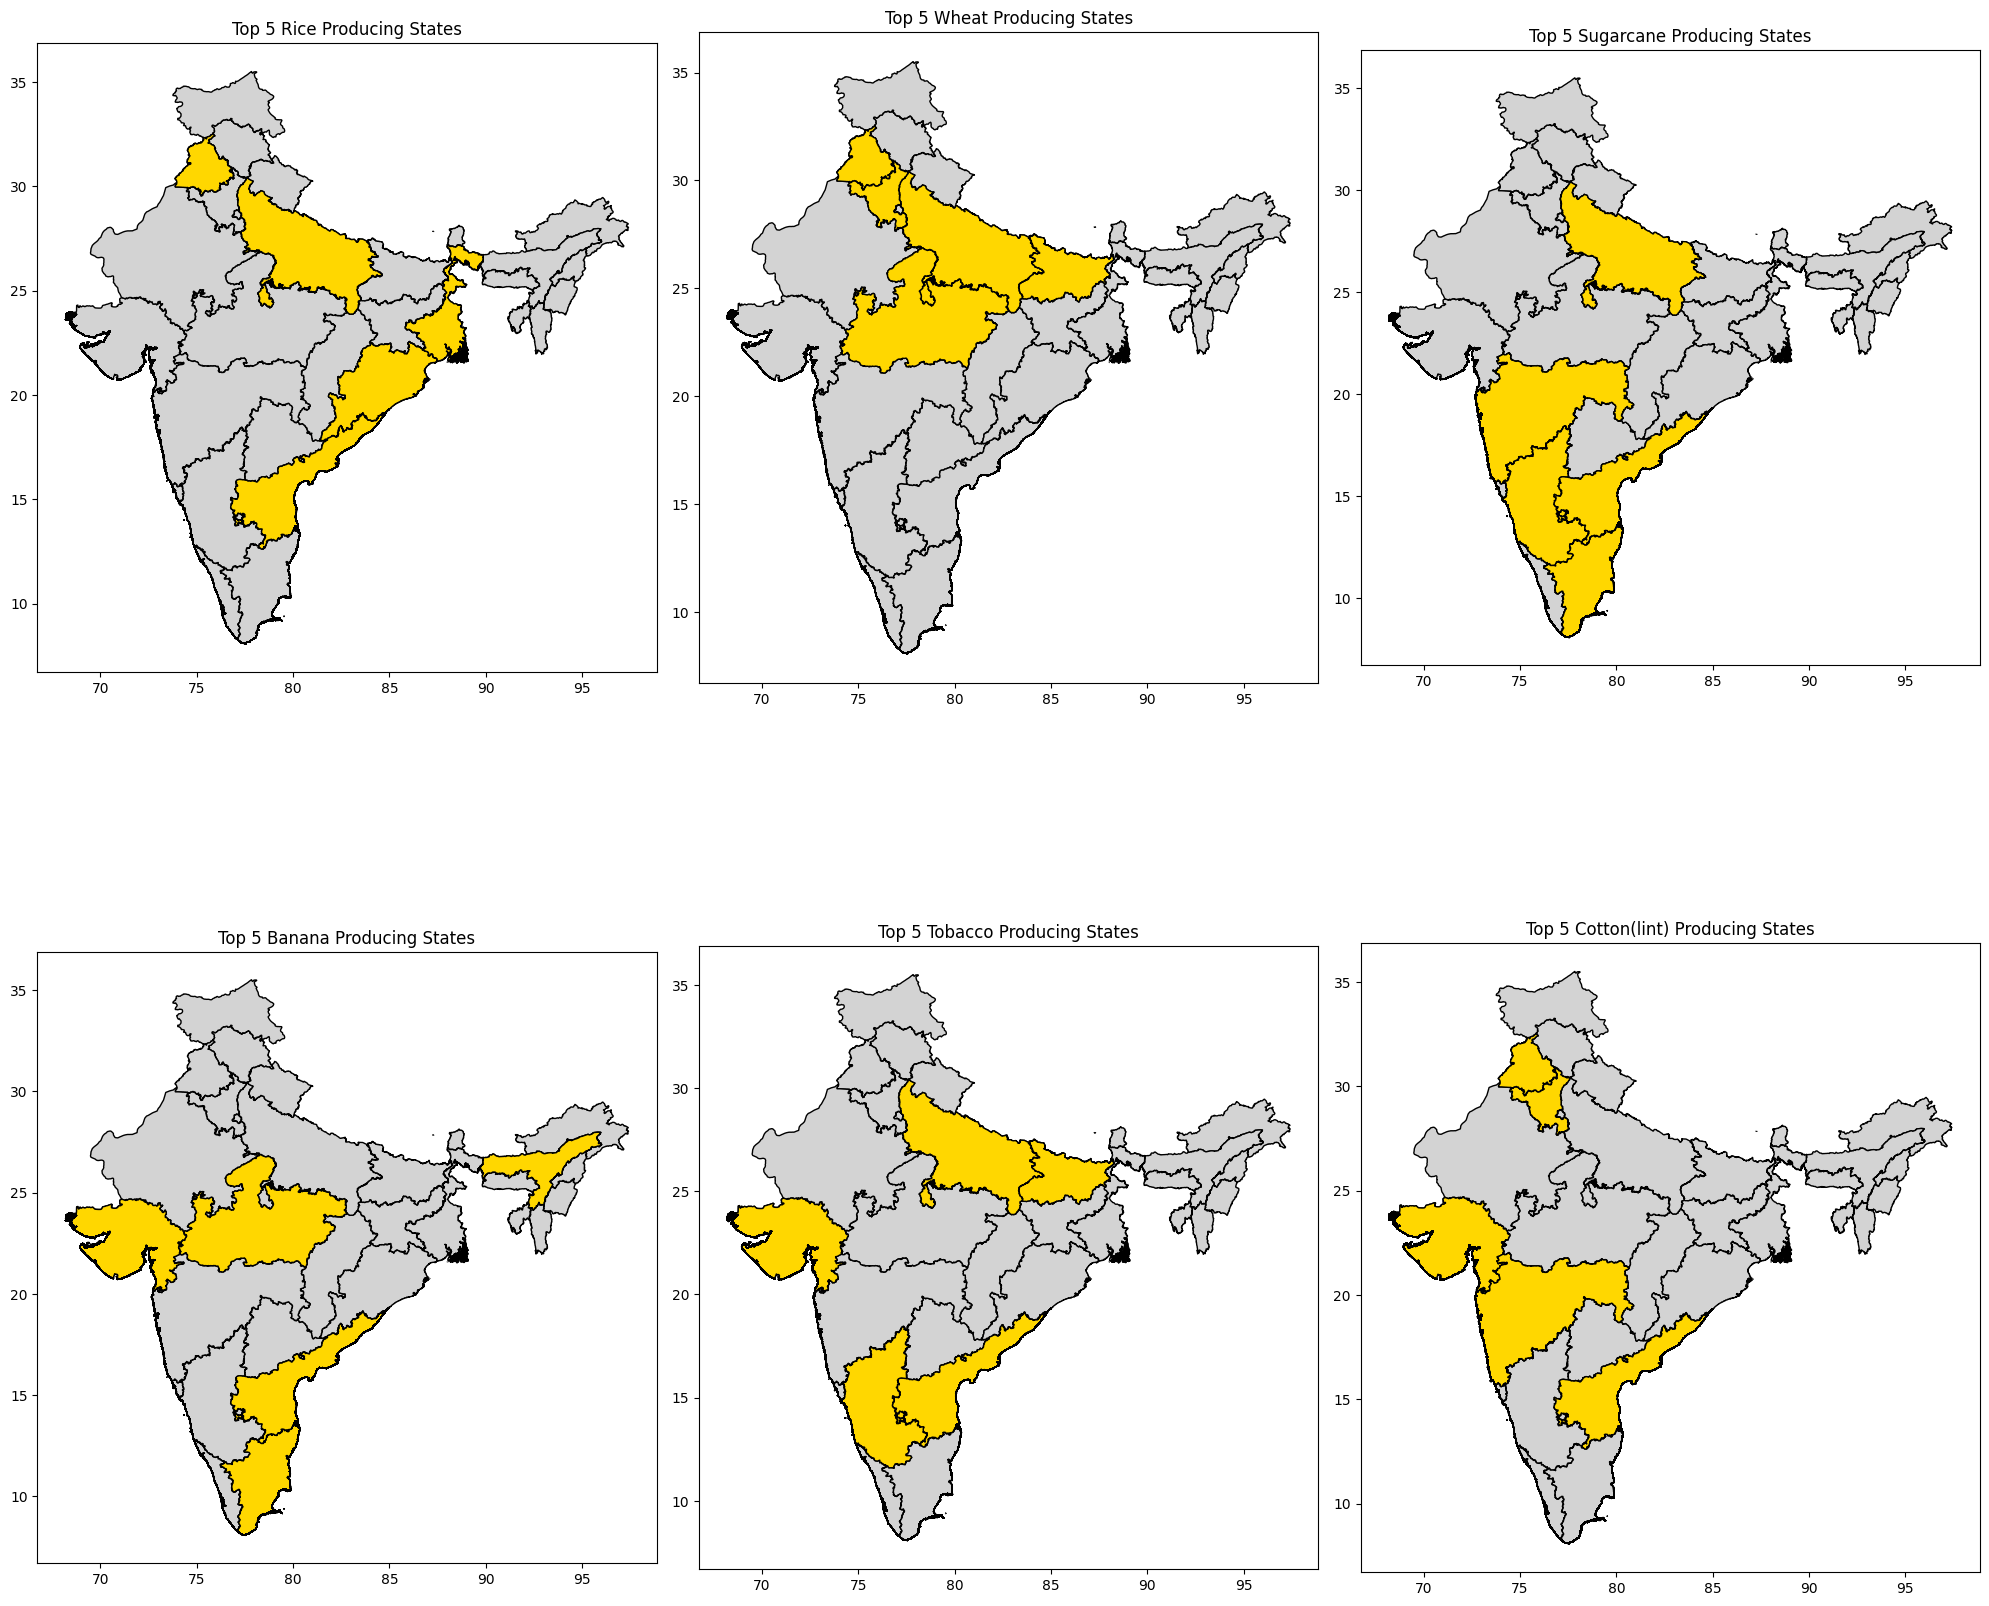

In [27]:
# finding top 5 states for the crops: 'Rice', 'Wheat', 'Sugarcane','Banana','Tobacco','Cotton(lint)'

crops = ['Rice', 'Wheat', 'Sugarcane','Banana','Tobacco','Cotton(lint)']
fig, axes = plt.subplots(2, 3, figsize=(20,20))
axes = axes.flatten()


for i, crop in enumerate(crops):

    crop_data = df[df['Crop'] == crop].groupby('State').agg({'Production': 'sum'}).reset_index() # calculating total production of each crop
    #print(crop_data)
    #break
    crop_data = crop_data.set_index('State')
    india_states_corp = india_states_original.copy() # making copy of geodata of indian map
    india_states_corp = india_states_corp.set_index('NAME_1')

    merged_geo_crop_data = india_states_corp.join(crop_data, how='left') # merging the geodata with the crop data
    #print(merged)
    top_5_states = merged_geo_crop_data.nlargest(5, 'Production') # getting the top 5 states for each crop

    india_states_corp.plot(ax=axes[i], color='lightgrey', edgecolor='black')   # plotting the heatmap
    top_5_states.plot(ax=axes[i], color='gold', edgecolor='black', legend=True)


    axes[i].set_title(f'Top 5 {crop} Producing States')
    #break


plt.tight_layout()
plt.show()

# Crop Yield Prediction using ML models

In [28]:
# installing packages
!pip install catboost

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor











In [30]:
df_ml = df.copy()

# dropping year column as it will not help in the prediction,  pesticide column is being dropped because it shows same correlation as fertilizer
df_ml = df_ml.drop(['Crop_Year','Pesticide'], axis = 1)

In [31]:
category_columns = df_ml.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [32]:
# doing one hot encoding for dummy columns

df_ml = pd.get_dummies(df_ml, columns = category_columns, drop_first=True)

In [33]:
df_ml.shape

(19652, 93)

In [34]:
df_ml.head()

,Area,Production,Annual_Rainfall,Fertilizer,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0.796087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,0.710435,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,0.238333,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,5238.051739,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,0.420909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Removing the target column for the features
x = df_ml.drop(['Yield'], axis = 1)
y = df_ml[['Yield']]

In [36]:
print(x.shape)
y.shape

(19652, 92)


(19652, 1)

In [37]:
x.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
y.head()

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909


### Splitting  the data set into train and test set

In [39]:
#split the data into training and test set

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [40]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((15721, 92), (3931, 92), (15721, 1), (3931, 1))

## Feature Engineering

In [41]:
# using power transformer to transform the data into gaussian distribution
pt = PowerTransformer(method='yeo-johnson')

x_train_pt_transform = pt.fit_transform(x_train)
x_test_pt_transform = pt.fit_transform(x_test)

In [42]:
df_pt_transform = pd.DataFrame(x_train_pt_transform, columns=x_train.columns)
df_pt_transform.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-0.330505,-0.034406,-2.067238,-0.307301,-0.160332,-0.16405,-0.111193,-0.12556,-0.081999,-0.062924,...,-0.199371,-0.187878,-0.145519,-0.111486,-0.210493,-0.14688,-0.153956,-0.210493,-0.192012,-0.244092
1,0.351292,0.151949,-2.414453,0.392059,-0.160332,-0.16405,-0.111193,-0.12556,-0.081999,-0.062924,...,-0.199371,-0.187878,6.871967,-0.111486,-0.210493,-0.14688,-0.153956,-0.210493,-0.192012,-0.244092
2,1.495038,0.682368,-0.303993,1.378318,-0.160332,-0.16405,-0.111193,-0.12556,-0.081999,-0.062924,...,-0.199371,-0.187878,-0.145519,-0.111486,-0.210493,-0.14688,-0.153956,4.750759,-0.192012,-0.244092
3,-0.152285,-0.170027,-0.683746,-0.109097,-0.160332,-0.16405,-0.111193,-0.12556,-0.081999,-0.062924,...,-0.199371,-0.187878,-0.145519,-0.111486,-0.210493,-0.14688,-0.153956,-0.210493,-0.192012,-0.244092
4,0.531047,0.557186,0.097257,0.488781,-0.160332,-0.16405,-0.111193,-0.12556,-0.081999,-0.062924,...,-0.199371,-0.187878,-0.145519,-0.111486,-0.210493,-0.14688,-0.153956,-0.210493,-0.192012,-0.244092


### Linear Regression

In [43]:
# Apply linear regresssion on the original dataset

lr = LinearRegression() # loading the model
lr.fit(x_train,y_train) # training the model

y_pred_train = lr.predict(x_train) # getting the train predictions
print("Training Accuracy (r2_score): ",r2_score(y_train,y_pred_train))  # getting the training accuracy
print("Training Error (MSE):", mean_squared_error(y_train, y_pred_train)) # getting the training error

print()

y_pred_test = lr.predict(x_test) # getting the test predictions
print("Test Accuracy (r2_score) : ",r2_score(y_test,y_pred_test))  # getting the test accuracy
print("Test Error (MSE):", mean_squared_error(y_test, y_pred_test)) # getting the training error

Training Accuracy (r2_score):  0.8491642117789917
Training Error (MAE): 119656.19122587104

Test Accuracy (r2_score) :  0.8135497538180607
Test Error (MAE): 128811.81827979891


In [44]:
# to store accuracy values of each model
train_accuracy_list = []
test_accuracy_list= []

In [45]:
# Using Linear Regression model on transformed data
lr.fit(x_train_pt_transform, y_train)

y_pred_train_lr = lr.predict(x_train_pt_transform)
y_pred_test_lr = lr.predict(x_test_pt_transform)

print("Training Accuracy (r2_score): ",r2_score(y_train,y_pred_train_lr))  # getting the training accuracy
print("Training Error (MSE):", mean_squared_error(y_train, y_pred_train_lr)) # getting the training error

print()
print("Test Accuracy (r2_score) : ",r2_score(y_test,y_pred_test_lr))  # getting the test accuracy
print("Test Error (MSE):", mean_squared_error(y_test, y_pred_test_lr)) # getting the training error

train_accuracy_list.append(r2_score(y_train,y_pred_train_lr))
test_accuracy_list.append(r2_score(y_test,y_pred_test_lr))

Training Accuracy (r2_score):  0.8536663716740877
Training Error (MSE): 116084.6826887345

Test Accuracy (r2_score) :  0.8231995324494281
Test Error (MSE): 122145.13074809642


# Random Forest Regressor

In [46]:
# Using Random Forest Regresssion
regr = RandomForestRegressor()

regr.fit(x_train_pt_transform, y_train)

y_pred_train_rf= regr.predict(x_train_pt_transform)
y_pred_test_rf = regr.predict(x_test_pt_transform)

print("Training Accuracy (r2_score): ",r2_score(y_train,y_pred_train_rf))  # getting the training accuracy
print("Training Error (MSE):", mean_squared_error(y_train, y_pred_train_rf)) # getting the training error

print()
print("Test Accuracy (r2_score) : ",r2_score(y_test,y_pred_test_rf))  # getting the test accuracy
print("Test Error (MSE):", mean_squared_error(y_test, y_pred_test_rf)) # getting the training error

train_accuracy_list.append(r2_score(y_train,y_pred_train_rf))
test_accuracy_list.append(r2_score(y_test,y_pred_test_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy (r2_score):  0.9969059190562535
Training Error (MAE): 2454.4966777432833

Test Accuracy (r2_score) :  0.9821987698139785
Test Error (MAE): 12298.234380667644


# Support Vector Regressor

In [47]:
# Using Support Vector Machine Regression model
svr = SVR()
svr.fit(x_train_pt_transform, y_train)

y_pred_train_svm= svr.predict(x_train_pt_transform)
y_pred_test_svm = svr.predict(x_test_pt_transform)

print("Training Accuracy (r2_score): ",r2_score(y_train,y_pred_train_svm))  # getting the training accuracy
print("Training Error (MSE):", mean_squared_error(y_train, y_pred_train_svm)) # getting the training error

print()
print("Test Accuracy (r2_score) : ",r2_score(y_test,y_pred_test_svm))  # getting the test accuracy
print("Test Error (MSE):", mean_squared_error(y_test, y_pred_test_svm)) # getting the training error

train_accuracy_list.append(r2_score(y_train,y_pred_train_svm))
test_accuracy_list.append(r2_score(y_test,y_pred_test_svm))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy (r2_score):  0.007463917052508928
Training Error (MAE): 787366.7697862749

Test Accuracy (r2_score) :  0.008384163981423276
Test Error (MAE): 685071.9775824497


# CatBoostRegressor

In [48]:
# using catboost regression model

cat = CatBoostRegressor(learning_rate=0.15)
cat.fit(x_train_pt_transform, y_train)

y_pred_train_cat = cat.predict(x_train_pt_transform)
y_pred_test_cat = cat.predict(x_test_pt_transform)

print("Training Accuracy (r2_score): ",r2_score(y_train,y_pred_train_cat))  # getting the training accuracy
print("Training Error (MSE):", mean_squared_error(y_train, y_pred_train_cat)) # getting the training error

print()
print("Test Accuracy (r2_score) : ",r2_score(y_test,y_pred_test_cat))  # getting the test accuracy
print("Test Error (MSE):", mean_squared_error(y_test, y_pred_test_cat)) # getting the training error

train_accuracy_list.append(r2_score(y_train,y_pred_train_cat))
test_accuracy_list.append(r2_score(y_test,y_pred_test_cat))

0:	learn: 779.9687248	total: 51.8ms	remaining: 51.8s
1:	learn: 679.4315002	total: 56.5ms	remaining: 28.2s
2:	learn: 592.5473384	total: 60.6ms	remaining: 20.1s
3:	learn: 517.7967349	total: 65ms	remaining: 16.2s
4:	learn: 457.0996494	total: 69.1ms	remaining: 13.8s
5:	learn: 406.3532919	total: 73.4ms	remaining: 12.2s
6:	learn: 362.7825331	total: 77.3ms	remaining: 11s
7:	learn: 327.0393093	total: 81.2ms	remaining: 10.1s
8:	learn: 296.0941366	total: 85ms	remaining: 9.35s
9:	learn: 270.9780694	total: 88.8ms	remaining: 8.79s
10:	learn: 247.4895801	total: 93ms	remaining: 8.36s
11:	learn: 230.3364026	total: 97ms	remaining: 7.98s
12:	learn: 212.0758027	total: 101ms	remaining: 7.68s
13:	learn: 199.5629905	total: 105ms	remaining: 7.41s
14:	learn: 188.0286145	total: 110ms	remaining: 7.21s
15:	learn: 177.9831705	total: 116ms	remaining: 7.14s
16:	learn: 170.2005459	total: 121ms	remaining: 7.02s
17:	learn: 164.0423665	total: 126ms	remaining: 6.88s
18:	learn: 155.3059796	total: 130ms	remaining: 6.72s
1

In [49]:
# Comparison of the models

algorithm = ['LinearRegression','RandomForestRegressor','SupprtVectorRegressor','CatBoostRegressor']
accu_data = {'Training Accuracy':train_accuracy_list,'Test Accuracy':test_accuracy_list}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy
LinearRegression,0.853666,0.823200
RandomForestRegressor,0.996906,0.982199
SupprtVectorRegressor,0.007464,0.008384
CatBoostRegressor,0.999959,0.973524
